In [177]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='D2Coding')
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [178]:
df_sales = pd.read_csv('../data/new_sales4.csv', encoding='euc-kr')
df_sales

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,수량추정,구매월,할인율
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800,16314,수유용품,더블하트 SofTouch 모유실감 젖꼭지 M (2입),2.000000,201905,0.37
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,5단계,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),1.155756,202002,0.26
2,201902282095385,2019-02-28,2019-03-01,2019-03-05,NaN,201812310749770,5610,3800,티슈,크리넥스？키즈용？화장지？3겹？27m 8롤,1.000000,201902,0.32
3,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,3단계,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),1.125142,201905,0.19
4,201905092356247,2019-05-10,2019-05-11,2019-05-13,5.0,201812310749774,50640,39788,3단계,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),1.000000,201905,0.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199511,20200521172454-86563196093,2020-05-22,2020-05-23,2020-05-25,3.0,201912281058006,5900,5900,3단계,NEW 하기스 맥스드라이 3단계 공용 20매(밴드형/체험팩) (EA),1.000000,202005,0.00
199512,201912283245128,2019-12-29,2019-12-30,2020-01-01,NaN,201912281058007,65880,52065,아이_생활용품,하기스 매직핏 꿀벅지 아기용 기저귀 3단계 공용 198매(밴드형),1.000000,201912,0.21
199513,202004103645638,2020-04-10,2020-04-11,2020-04-13,3.0,201912281058011,9500,7524,이벤트,더블하트 다기능 빨대 브러쉬,1.000000,202004,0.21
199514,201912283245152,2019-12-29,2019-12-30,2020-01-02,-3.0,201912281058012,3000,3000,이벤트,맘큐 허그박스,1.000000,201912,0.00


In [179]:
sales_outlier_cond = np.array(df_sales['구매시월령(수정)'] > 72)
sales_na_cond = np.array(df_sales['구매시월령(수정)'].isna())
sales_cond = ~np.any([sales_na_cond, sales_outlier_cond], axis=0)
sales = df_sales[sales_cond]

interval = 3

sales_df = sales[['구매시월령(수정)', '구매금액', '물품대분류']]
sales_df['월령 구간'] = sales_df['구매시월령(수정)'] // interval
sales_df.drop('구매시월령(수정)', axis=1, inplace=True)

def set_month_interval(x):
    if x < 0:
        return 0
    else:
        return int(x)

sales_df['월령 구간'] = sales_df['월령 구간'].apply(lambda x: set_month_interval(x))
sales_df

/var/folders/dn/nwjs23j94h3489_1w10d3x280000gr/T/ipykernel_28039/1700223585.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df['월령 구간'] = sales_df['구매시월령(수정)'] // interval
/var/folders/dn/nwjs23j94h3489_1w10d3x280000gr/T/ipykernel_28039/1700223585.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df.drop('구매시월령(수정)', axis=1, inplace=True)
/var/folders/dn/nwjs23j94h3489_1w10d3x280000gr/T/ipykernel_28039/1700223585.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

,구매금액,물품대분류,월령 구간
0,25800,수유용품,1
1,51200,5단계,4
3,59520,3단계,22
4,50640,3단계,1
5,101280,3단계,2
...,...,...,...
199510,3000,이벤트,0
199511,5900,3단계,1
199513,9500,이벤트,1
199514,3000,이벤트,0


In [180]:
sales_grouped_proportion = sales_df.groupby(["월령 구간", "물품대분류"], as_index=False).sum()
sales_grouped_proportion["월령 구간 합계"] = sales_grouped_proportion.groupby("월령 구간")[
    "구매금액"
].transform(sum)
sales_grouped_proportion["월령 별 구매금액 비율"] = (
    sales_grouped_proportion["구매금액"] / sales_grouped_proportion["월령 구간 합계"]
)

# sales_grouped_proportion['월령 구간'] = sales_grouped_proportion['월령 구간'].apply(lambda x: '출생 전' if x == 0 else x)

sales_grouped_proportion = sales_grouped_proportion[
    (sales_grouped_proportion["물품대분류"] == "1단계")
    | (sales_grouped_proportion["물품대분류"] == "2단계")
    | (sales_grouped_proportion["물품대분류"] == "3단계")
    | (sales_grouped_proportion["물품대분류"] == "4단계")
    | (sales_grouped_proportion["물품대분류"] == "5단계")
    | (sales_grouped_proportion["물품대분류"] == "6단계")
    | (sales_grouped_proportion["물품대분류"] == "7단계")
    | (sales_grouped_proportion["물품대분류"] == "수유용품")
    | (sales_grouped_proportion["물품대분류"] == "티슈")
]

sales_grouped_proportion

,월령 구간,물품대분류,구매금액,월령 구간 합계,월령 별 구매금액 비율
0,0,1단계,140177850,1453645790,0.096432
1,0,2단계,467707510,1453645790,0.321748
2,0,3단계,161909160,1453645790,0.111381
3,0,4단계,22646980,1453645790,0.015579
4,0,5단계,18255440,1453645790,0.012558
...,...,...,...,...,...
472,24,5단계,458490,3844520,0.119258
473,24,6단계,86920,3844520,0.022609
474,24,7단계,42300,3844520,0.011003
477,24,수유용품,646500,3844520,0.168161


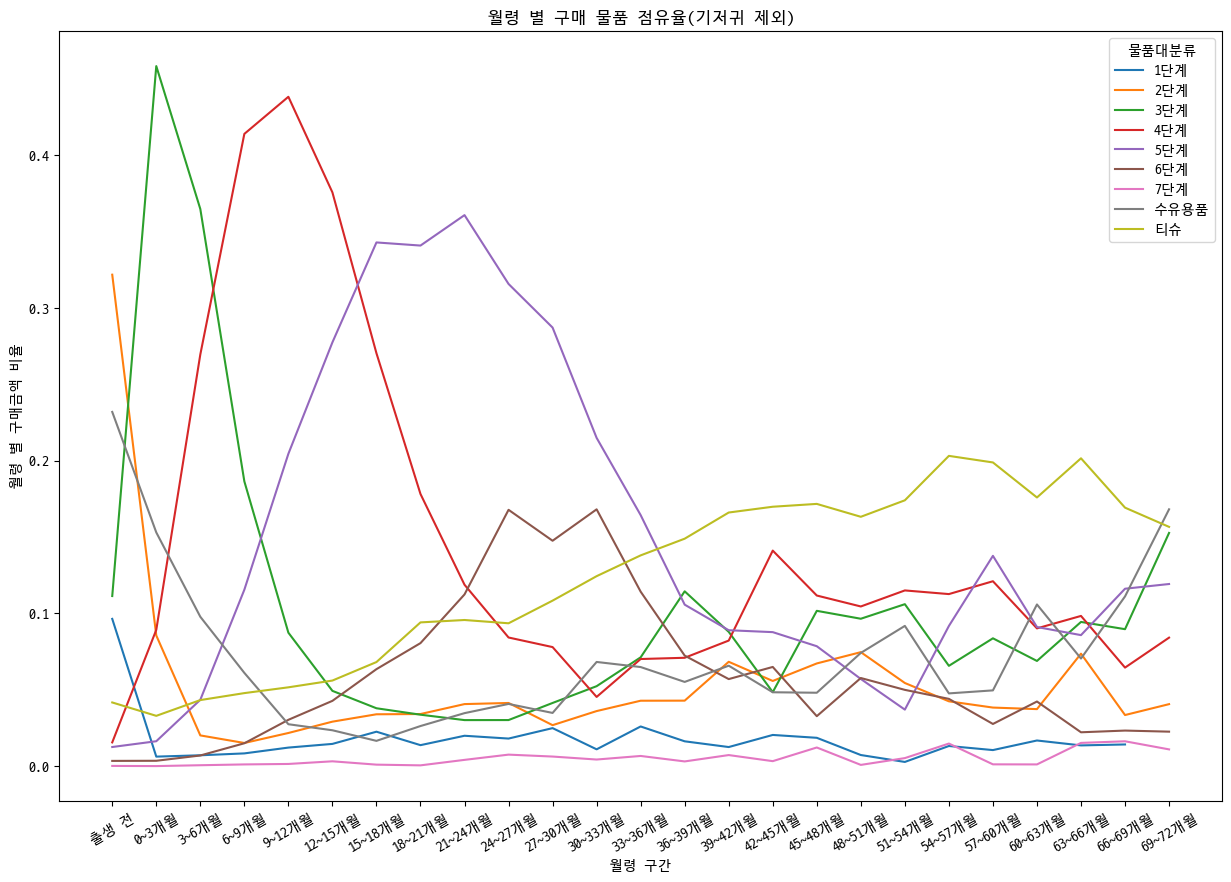

In [181]:
plt.figure(figsize=(15, 10))
sns.lineplot(x='월령 구간', y='월령 별 구매금액 비율', hue='물품대분류', data=sales_grouped_proportion)
plt.title('월령 별 구매 물품 점유율(기저귀 제외)')

tick = [f'{i}~{i + 3}개월' for i in range(0, 70, 3)]
tick.insert(0, '출생 전')
plt.xticks(list(range(0, 25)), tick, rotation=30)
# plt.legend(loc='upper right')
# plt.ylim(0.05, 0.5)

plt.show()

# 그래프 노션에 올리기

In [182]:
# sales_grouped = sales_df[sales_df['월령 구간'] == -1].groupby(['월령 구간', '물품대분류']).sum()
# saled_grouped_proportion = sales_grouped / sales_grouped.sum(axis=0)
# saled_grouped_proportion['구매금액'].plot()
# plt.xticks(list(num2prod.keys()), list(num2prod.values()), rotation=90)
# plt.title('월령구간 0개월 까지의 물품대분류 별 물품 점유율')
# plt.show()

# fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# for i, ax in enumerate(axes.ravel()):
#     sales_grouped = sales_df[sales_df['월령 구간'] == i].groupby(['월령 구간', '물품대분류']).sum()
#     saled_grouped_proportion = sales_grouped / sales_grouped.sum(axis=0)
#     saled_grouped_proportion['구매금액'].plot(ax=ax)
    
#     ax.tick_params(rotation=90, axis='x')
#     ax.set_title(f'월령구간 {interval * i} ~ {interval * (i + 1)}개월까지의 물품 대분류 별 점유율')
#     ax.set_xticks(list(num2prod.keys()), list(num2prod.values()))

# fig.tight_layout()
# plt.show()

In [183]:
df_sales = pd.read_csv('../data/merged_delivery.csv', encoding='euc-kr')

sales_outlier_cond = np.array(df_sales['구매시월령(수정)'] > 72)
sales_na_cond = np.array(df_sales['구매시월령(수정)'].isna())
sales_cond = ~np.any([sales_na_cond, sales_outlier_cond], axis=0)
sales = df_sales[sales_cond]

sales['물품대분류'] = sales['물품대분류'].apply(lambda x: '기저귀' if '단계' in x else x)
sales

/var/folders/dn/nwjs23j94h3489_1w10d3x280000gr/T/ipykernel_28039/1400461934.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['물품대분류'] = sales['물품대분류'].apply(lambda x: '기저귀' if '단계' in x else x)


,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,수량추정,구매월,할인율,거주지역,출고기간,배송기간,구매요일
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800,16314,수유용품,더블하트 SofTouch 모유실감 젖꼭지 M (2입),2.000000,201905,0.37,인천,1,4,0
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,기저귀,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),1.155756,202002,0.26,인천,1,2,3
2,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),1.125142,201905,0.19,부산,1,2,0
3,201905092356247,2019-05-10,2019-05-11,2019-05-13,5.0,201812310749774,50640,39788,기저귀,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),1.000000,201905,0.21,경남,1,2,4
4,201907282649358,2019-07-29,2019-07-30,2019-08-02,8.0,201812310749774,101280,76744,기저귀,[2019년형] 하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),3.421622,201907,0.24,경남,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166352,201912283245106,2019-12-29,2019-12-30,2020-01-01,0.0,201912281058006,3000,3000,이벤트,맘큐 허그박스,1.000000,201912,0.00,충남,1,2,6
166353,20200521172454-86563196093,2020-05-22,2020-05-23,2020-05-25,3.0,201912281058006,5900,5900,기저귀,NEW 하기스 맥스드라이 3단계 공용 20매(밴드형/체험팩) (EA),1.000000,202005,0.00,충남,1,2,4
166354,202004103645638,2020-04-10,2020-04-11,2020-04-13,3.0,201912281058011,9500,7524,이벤트,더블하트 다기능 빨대 브러쉬,1.000000,202004,0.21,충북,1,2,4
166355,201912283245152,2019-12-29,2019-12-30,2020-01-02,-3.0,201912281058012,3000,3000,이벤트,맘큐 허그박스,1.000000,201912,0.00,서울,1,3,6


In [313]:
grouped_sales = sales.groupby('물품대분류')['결제금액', '수량추정'].sum()
grouped_sales = grouped_sales / grouped_sales.sum()
grouped_sales

/var/folders/dn/nwjs23j94h3489_1w10d3x280000gr/T/ipykernel_28039/439678638.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_sales = sales.groupby('물품대분류')['결제금액', '수량추정'].sum()


,결제금액,수량추정
물품대분류,,
기저귀,0.643292,0.330404
기타,0.000138,0.000452
마스크,0.008094,0.047353
생리대,0.017767,0.061481
수유용품,0.127362,0.156823
아이_생활용품,0.020971,0.035212
어른_생활용품,0.012326,0.019626
음식,0.003542,0.005173
이벤트,0.058160,0.159067


In [314]:
# sales.groupby('물품대분류')['결제금액', '수량추정'].sum().sort_values(by='결제금액', ascending=False).iloc[:5]['결제금액']
grouped_sales.sort_values(by='결제금액', ascending=False)

,결제금액,수량추정
물품대분류,,
기저귀,0.643292,0.330404
수유용품,0.127362,0.156823
이벤트,0.058160,0.159067
티슈,0.056086,0.084836
아이_생활용품,0.020971,0.035212
주방용품,0.018334,0.042398
생리대,0.017767,0.061481
화장품,0.014941,0.026293
청결용품,0.014007,0.024841


Text(0.5, 1.0, '전체 매출 (단위: 비율)')

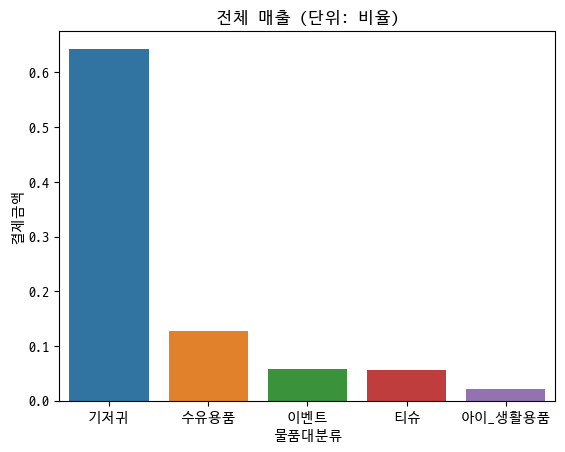

In [315]:
grouped_sales_price = grouped_sales['결제금액'].sort_values(ascending=False).iloc[:5].reset_index()
sns.barplot(data=grouped_sales_price, x='물품대분류', y='결제금액')
plt.title('전체 매출 (단위: 비율)')

Text(0.5, 1.0, '전체 수량 (단위: 비율)')

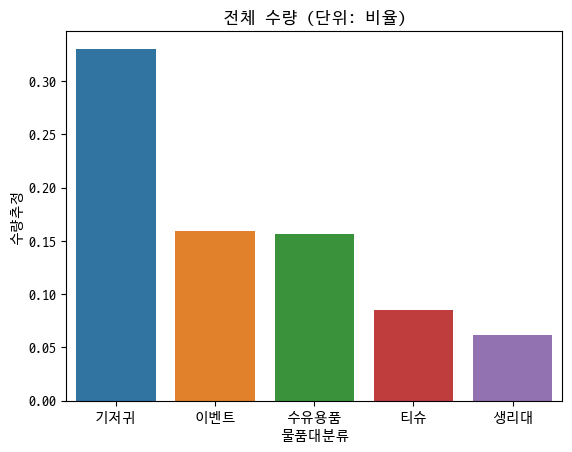

In [316]:
grouped_sales_count = grouped_sales['수량추정'].sort_values(ascending=False).iloc[:5].reset_index()
sns.barplot(data=grouped_sales_count, x='물품대분류', y='수량추정')
plt.title('전체 수량 (단위: 비율)')